<div align="center">

# **Project_Hospitales**

</div>

## 1. Planteamiento de la problemática

 Hemos sido contratados en el equipo de ciencia de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de atención en salud para un importante hospital. 

 ***Nuestro cliente desea saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización.***

Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento. 

Dado que tienen en su base de datos algunos datos referentes a los pacientes y resultados de exámenes diagnósticos, de pacientes hospitalizados y no hospitalizados, nos han entregado esta información.  

Para ello, nuestro departamento de datos ha recopilado:

1. Antecedentes del paciente.
1. Morbilidad asociada al paciente.
1. Antecedentes relacionados con la toma de la biopsia.
1. Complicaciones infecciosas.

En la siguiente tabla, se encuentra un diccionario de datos asociado:


![image](https://user-images.githubusercontent.com/118769777/220240501-8c21461d-2de5-495b-954e-10fb9bf38014.png)

El departamente de datos advierte que hay algunos problemas de calidad de datos en la información suministrada por lo que el primer reto del equipo es realizar un análisis exploratorio de los datos con el fin de transformar y preparar las datos adecuadamente. 


## 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, continuamos con el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.

In [1082]:
#Importamos librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

### 2.1 Carga del dataset y visualización preliminar de sus datos

In [1083]:
data = pd.read_excel('BBDD_Hospitalización.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [1084]:
data.describe(include='all')

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,568,568,564.000000,566,567,568,568.000000,567,566,568,568,568,568,568,551,568,565,568.000000,568.000000
unique,NaN,2,2,NaN,2,2,5,NaN,2,4,11,6,2,2,4,3,5,2,NaN,NaN
top,NaN,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NaN,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,NaN,NaN
freq,NaN,505,563,NaN,510,408,448,NaN,563,546,322,542,531,562,560,543,561,541,NaN,NaN
mean,63.882042,NaN,NaN,13.271401,NaN,NaN,NaN,12.996479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165493,0.014085
std,9.281517,NaN,NaN,15.668966,NaN,NaN,NaN,3.921180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958066,0.196474
min,39.000000,NaN,NaN,0.600000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,59.000000,NaN,NaN,5.600000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,64.000000,NaN,NaN,8.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,69.000000,NaN,NaN,15.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


### 2.2 Eliminacion de variables irrelevantes
En el planteo de la problemática se define como 'caso' al paciente que fue sometido a biopsia y que luego de 30 dias presentó fiebre, infección urinaria o sepsis. De esta manera, el grupo de variables del tipo 'Complicaciones Infecciosas' nos indican que la persona presenta alguno de estos síntomas y no queremos añadirlo al modelo porque genera un sesgo. 

In [1085]:
col_sesgo = [ 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
             'FIEBRE',
             'ITU',
             'TIPO DE CULTIVO',
             'AGENTE AISLADO',
             'PATRON DE RESISTENCIA',
             'DIAS HOSPITALIZACION MQ',
             'DIAS HOSPITALIZACIÓN UPC']

data.drop(col_sesgo,axis=1,inplace=True)

data.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'HOSPITALIZACION'],
      dtype='object')

### 2.3 Distribución estadistica para variables numéricas

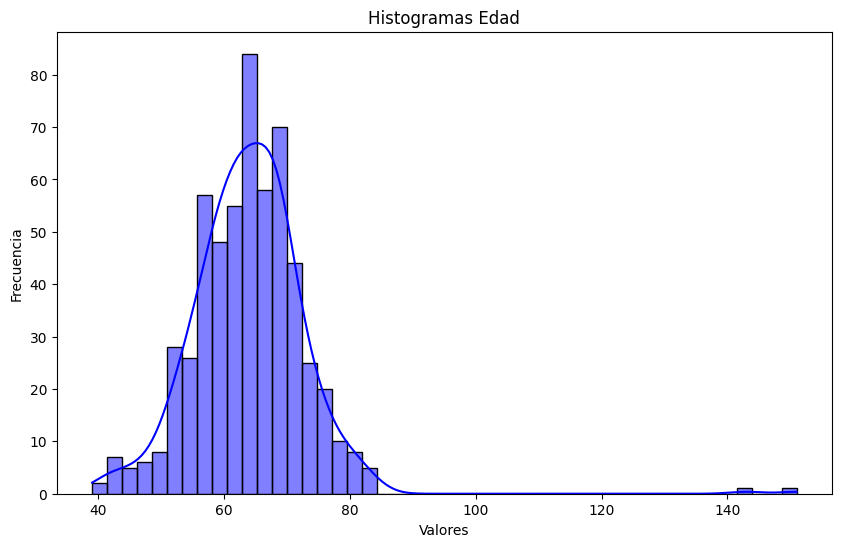

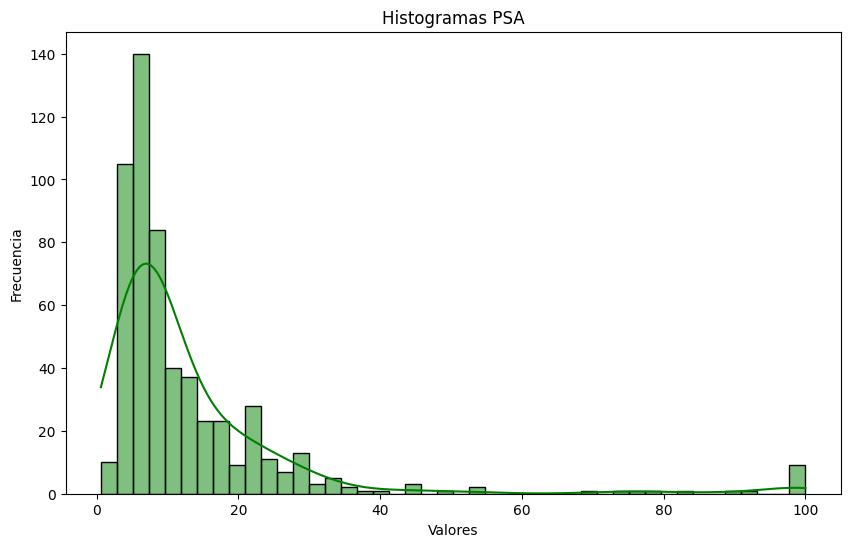

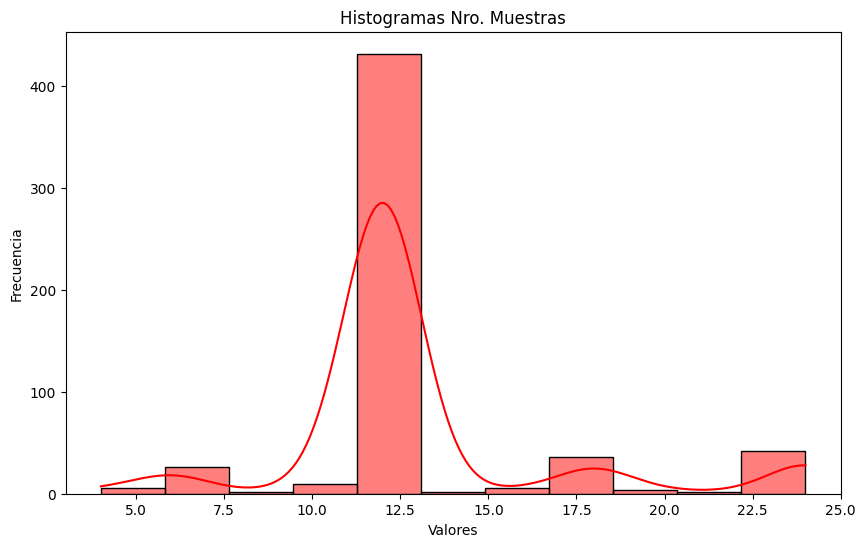

In [1086]:
## Histograma EDAD
plt.figure(figsize=(10, 6)) 
sns.histplot(data, x="EDAD", kde=True, color="blue")

plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histogramas Edad")

## Histograma PSA
plt.figure(figsize=(10, 6)) 
sns.histplot(data, x="PSA", kde=True, color="green")

plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histogramas PSA")

## Histograma NUMERO DE MUESTRAS TOMADAS
plt.figure(figsize=(10, 6)) 
sns.histplot(data, x="NUMERO DE MUESTRAS TOMADAS", kde=True, color="red")

plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histogramas Nro. Muestras")

# Mostrar el gráfico
plt.show()
plt.show()
plt.show()


### 2.4 Frecuencia de variables categóricas

/var/folders/8z/m3nmk2f90k7cx5y5spf813240000gn/T/ipykernel_48313/231483503.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[10, 10, -5, 0.8])


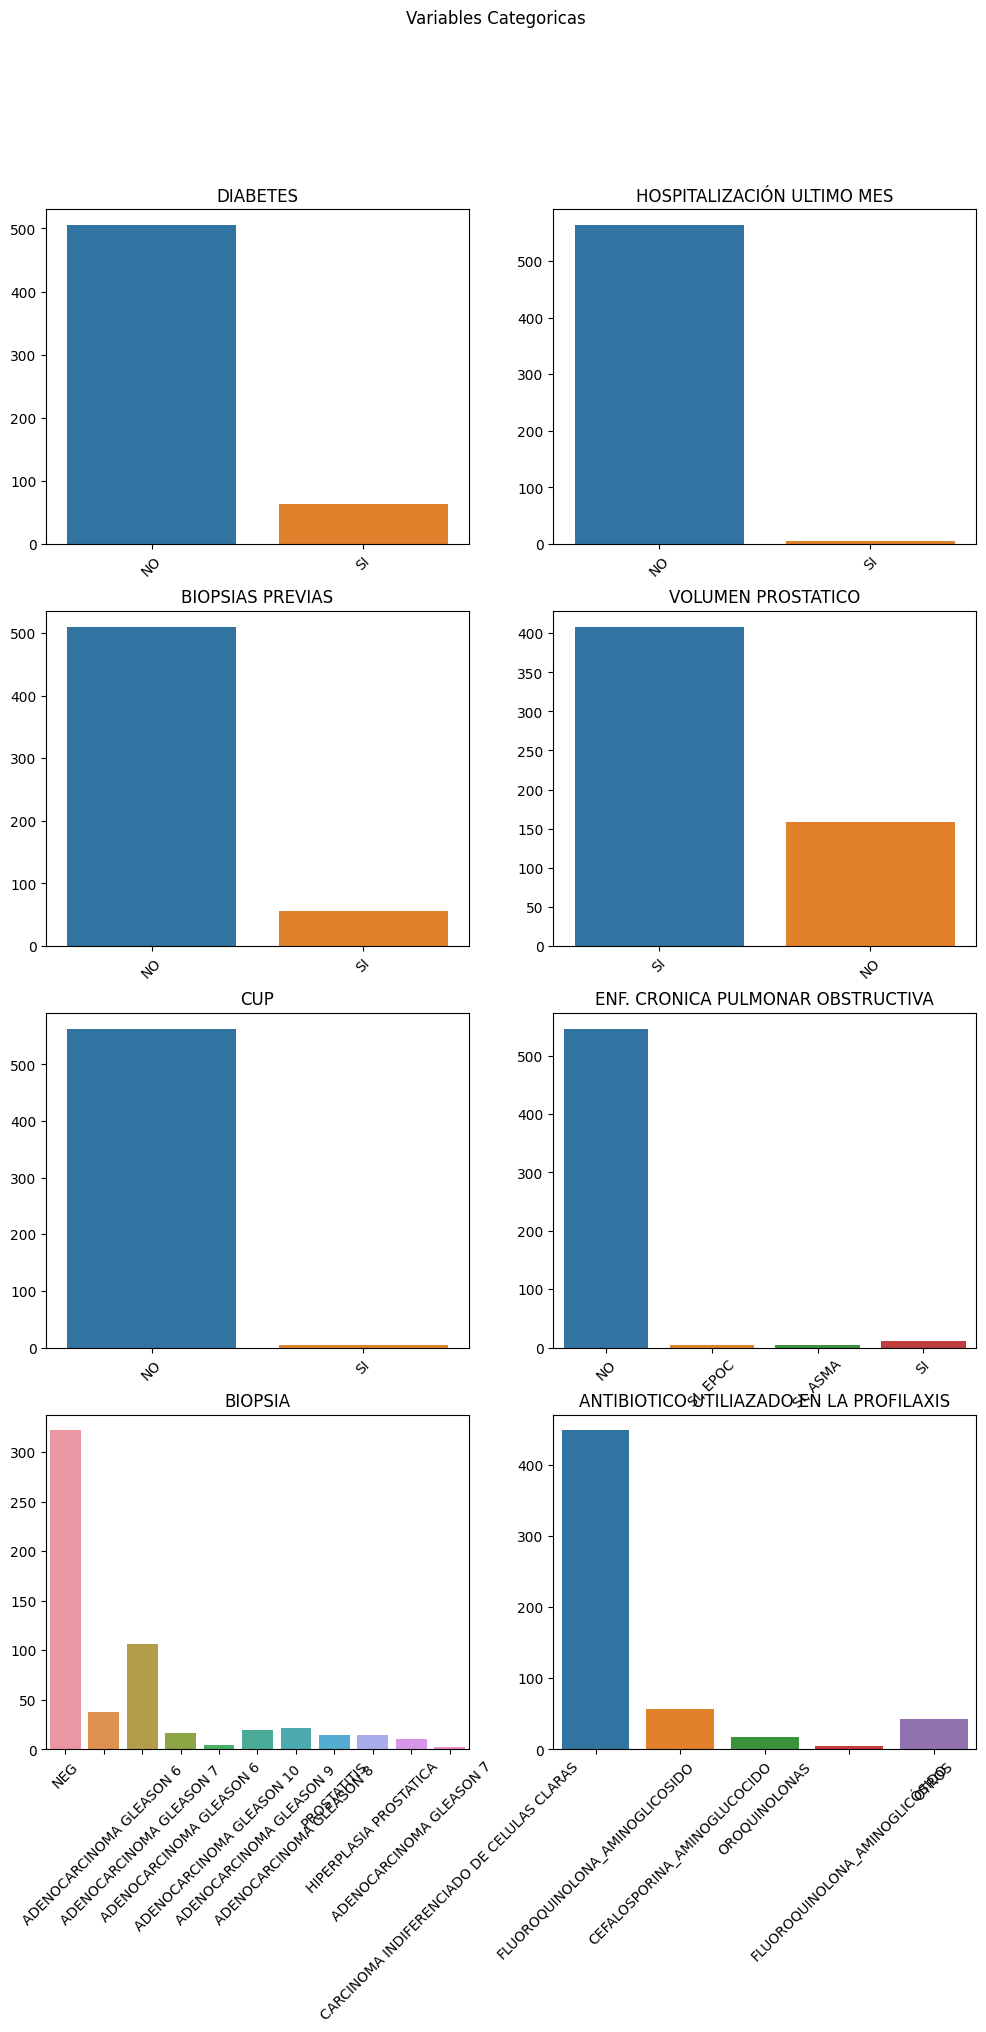

In [1087]:
def plot_bar_plots(data):
    variables_categoricas = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 
                             'BIOPSIAS PREVIAS',
                            'VOLUMEN PROSTATICO',
                            'CUP', 
                            'ENF. CRONICA PULMONAR OBSTRUCTIVA','BIOPSIA' , 
                            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS']
                            
    fig, axes = plt.subplots(4, 2, figsize=(12, 20))
    fig.suptitle('Variables Categoricas')
    axes = axes.flatten()
    for i, feature in enumerate(variables_categoricas):
        sns.countplot(x=data[feature], ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[10, 10, -5, 0.8])

plot_bar_plots(data)
plt.show()

### 2.5 Tratamiento de valores nulos

In [1088]:
## Visualizamos la cantidad de nulos por columna

nulos = data.isnull().sum()
nulos


EDAD                                       2
DIABETES                                   2
HOSPITALIZACIÓN ULTIMO MES                 2
PSA                                        6
BIOPSIAS PREVIAS                           4
VOLUMEN PROSTATICO                         3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS    2
NUMERO DE MUESTRAS TOMADAS                 2
CUP                                        3
ENF. CRONICA PULMONAR OBSTRUCTIVA          4
BIOPSIA                                    2
HOSPITALIZACION                            5
dtype: int64

**2.5.1 Variable objetivo 'Hospitalización'**

Nuestra variable objetivo presenta 5 valores nulos, por lo que procedemos a eliminarlos.

In [1089]:
print('Cantidad de registros considerando valores nulos:', data.shape[0])
data.dropna(subset=['HOSPITALIZACION'], inplace = True)
print('Cantidad de registros luego de la eliminacion:', data.shape[0])


Cantidad de registros considerando valores nulos: 570
Cantidad de registros luego de la eliminacion: 565


**2.5.2 Variable numéricas**

A las variables numéricas las reemplazamos por la el valor de la media

In [1090]:
media_edad = round(data.EDAD.mean(),2)
data.EDAD.fillna(media_edad,inplace=True)

media_psa = round(data.PSA.mean(),2)
data.PSA.fillna(media_psa,inplace=True)

media_nro_muestras = round(data['NUMERO DE MUESTRAS TOMADAS'].mean(),2)
data['NUMERO DE MUESTRAS TOMADAS'].fillna(media_nro_muestras,inplace=True)



**2.5.3 Variables restantes**

Eliminamos los valores nulos 

In [1091]:
restantes = ['BIOPSIAS PREVIAS', 
             'VOLUMEN PROSTATICO',
             'CUP',
             'ENF. CRONICA PULMONAR OBSTRUCTIVA']

data.dropna(subset=restantes, inplace = True)

In [1092]:
data.isnull().sum()

EDAD                                       0
DIABETES                                   0
HOSPITALIZACIÓN ULTIMO MES                 0
PSA                                        0
BIOPSIAS PREVIAS                           0
VOLUMEN PROSTATICO                         0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS    0
NUMERO DE MUESTRAS TOMADAS                 0
CUP                                        0
ENF. CRONICA PULMONAR OBSTRUCTIVA          0
BIOPSIA                                    0
HOSPITALIZACION                            0
dtype: int64

### 2.6 Normalización de variables categoricas
Buscamos valores repetidos o anomalos y generamos las correcciones pertinentes.

**2.6.1 Antibioticos**

In [1093]:
data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'FLUOROQUINOLONA_AMINOGLICÓSIDO', 'OTROS'],
      dtype=object)

In [1094]:
## Reemplazamos valores 

cambio = {'FLUOROQUINOLONA_AMINOGLICÓSIDO':'FLUOROQUINOLONA_AMINOGLICOSIDO'}
data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace(cambio)

**2.6.2 Biopsia**

In [1095]:
data['BIOPSIA'].unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
       'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ',
       'PROSTATITIS', 'HIPERPLASIA PROSTATICA',
       'ADENOCARCINOMA GLEASON 7',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'], dtype=object)

In [1096]:
data['BIOPSIA'] = data['BIOPSIA'].str.strip()

**2.6.3 Enf. Crónica**

In [1097]:
data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].unique()

array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI'], dtype=object)

In [1098]:
data['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC','SI')
data['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA','SI')

### 2.7 Matriz de correlación

**2.7.1 Correlación variables numericas**

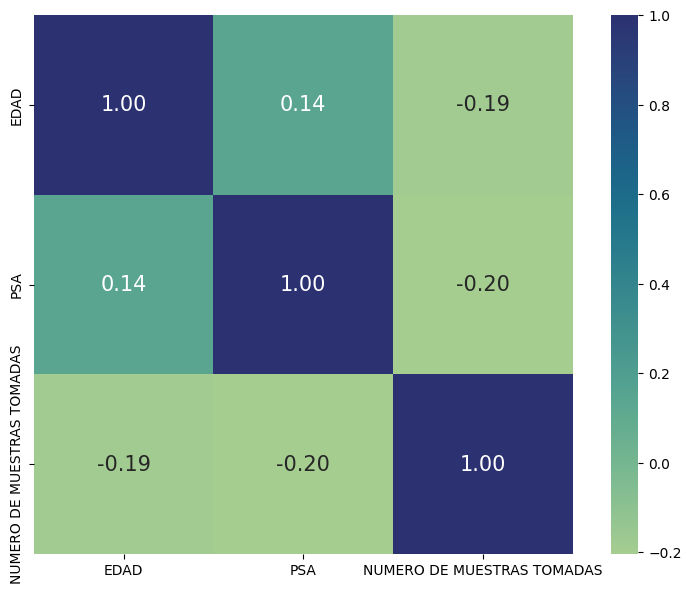

In [1099]:
variables_numericas = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS']

corr = data[variables_numericas].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= variables_numericas,
           yticklabels= variables_numericas,
           cmap= 'crest')
plt.show()

### 2.8 Generamos Dummies para modelar

In [1100]:
## Variables Binarias

corr = {"NO": 0, "SI": 1}

columnas = ['DIABETES', 
                          'HOSPITALIZACIÓN ULTIMO MES', 
                          'BIOPSIAS PREVIAS',
                          'VOLUMEN PROSTATICO',
                          'CUP', 
                          'ENF. CRONICA PULMONAR OBSTRUCTIVA',
                          'HOSPITALIZACION']

data[columnas] = data[columnas].replace(corr)
data.head(3)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,HOSPITALIZACION
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,NEG,1


In [1101]:
## Variables multiples

var_categorica = "BIOPSIA"
dummies1 = pd.get_dummies(data[var_categorica], prefix='BIOPSIA')
data_dum = pd.concat([data, dummies1], axis=1)

var_categorica2 = "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"
dummies2= pd.get_dummies(data[var_categorica2], prefix='ANTIBIOTICO USADO')
data_dum = pd.concat([data_dum, dummies2], axis=1)

data_dum.drop('ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',axis=1,inplace=True)
data_dum.drop('BIOPSIA',axis=1,inplace=True)

data_dum

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,HOSPITALIZACION,...,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,ANTIBIOTICO USADO_CEFALOSPORINA_AMINOGLUCOCIDO,ANTIBIOTICO USADO_FLUOROQUINOLONA_AMINOGLICOSIDO,ANTIBIOTICO USADO_OROQUINOLONAS,ANTIBIOTICO USADO_OTROS
0,53.0,0,0,4.0,0,1,12.0,0,0,1,...,False,False,False,False,True,False,False,True,False,False
1,56.0,0,0,7.7,0,1,12.0,0,0,1,...,False,False,False,False,True,False,False,True,False,False
2,57.0,0,0,29.0,1,1,24.0,0,0,1,...,False,False,False,False,True,False,False,True,False,False
3,56.0,0,0,7.0,0,1,12.0,0,0,1,...,False,False,False,False,True,False,False,True,False,False
4,55.0,0,0,29.0,1,1,24.0,0,0,1,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57.0,0,0,4.8,0,0,12.0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
561,75.0,0,0,75.0,0,1,12.0,0,0,0,...,True,False,False,False,False,False,False,True,False,False
562,78.0,0,0,9.3,0,1,12.0,0,0,0,...,False,False,False,False,True,False,True,False,False,False
563,67.0,0,0,6.0,0,1,12.0,0,0,0,...,False,False,False,False,False,False,False,True,False,False


### 2.9 Balanceo con oversampleo

In [1138]:
# Separar las características y la variable objetivo
X = data_dum.drop('HOSPITALIZACION', axis=1)  # Características
y = data_dum['HOSPITALIZACION']  # Variable objetivo

# Crear el objeto de oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')

# Aplicar el oversampling a las características y la variable objetivo
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las características oversampleadas y la variable objetivo
data_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)

data_oversampled.shape[0]

1074

### 2.9 Creación de archivo CSV para crear modelo

In [1114]:
data_oversampled.to_csv('Data_Modelo.csv',index=False)

## 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.

In [1104]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score



### 3.1 Cargamos la base de datos creada en el punto 2.10

In [1115]:
data_modelo = pd.read_csv('Data_Modelo.csv')

In [1116]:
data_modelo

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA_ADENOCARCINOMA GLEASON 10,...,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,ANTIBIOTICO USADO_CEFALOSPORINA_AMINOGLUCOCIDO,ANTIBIOTICO USADO_FLUOROQUINOLONA_AMINOGLICOSIDO,ANTIBIOTICO USADO_OROQUINOLONAS,ANTIBIOTICO USADO_OTROS,HOSPITALIZACION
0,53.0,0,0,4.0,0,1,12.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
1,56.0,0,0,7.7,0,1,12.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
2,57.0,0,0,29.0,1,1,24.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
3,56.0,0,0,7.0,0,1,12.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
4,55.0,0,0,29.0,1,1,24.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,55.0,1,1,4.0,0,1,12.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
1070,55.0,1,1,4.0,0,1,12.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
1071,68.0,0,0,6.2,0,1,12.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1
1072,55.0,0,0,29.0,1,1,24.0,0,0,False,...,False,False,False,True,False,False,True,False,False,1


### 3.2 Separación del dataset en X e y (variable objetivo)

In [1117]:
X = data_modelo.drop(['HOSPITALIZACION'],axis=1)
y = data_modelo['HOSPITALIZACION']


### 3.3 División del dataset en X_train, X_test, y_train y y_test

In [1118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

### 3.4 Modelo 1: **Árbol de decisión (max_depth = arbitrario)** 




**3.3.1 Instanciamiento**

In [1119]:
modelo1 = DecisionTreeClassifier()

**3.3.2 Entrenamiento**

In [1120]:
modelo1.fit(X_train, y_train)

DecisionTreeClassifier()

**3.3.2 Predicción**

In [1121]:
## Prediccion sobre set entrenamiento
y_train_pred1 = modelo1.predict(X_train)

## Prediccion sobre set testeo
y_test_pred1 = modelo1.predict(X_test)

print('Accuracy Train:', accuracy_score(y_train_pred1,y_train))
print('Accuracy Test:', accuracy_score(y_test_pred1,y_test))

Accuracy Train: 0.9976717112922002
Accuracy Test: 0.9953488372093023


### 3.5 Matriz de confusión

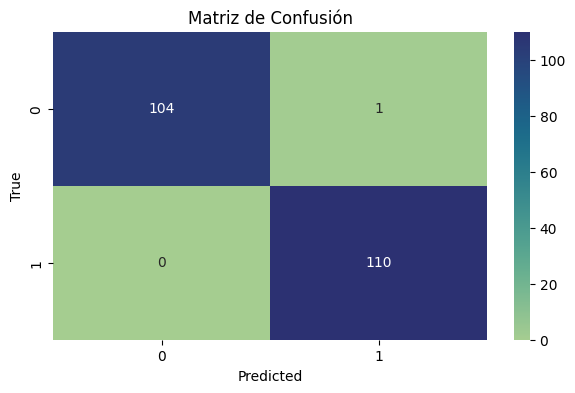

In [1123]:
matriz = confusion_matrix(y_test, y_test_pred1)

plt.figure(figsize=(7,4))
sns.heatmap(matriz, annot=True, fmt="d", cmap='crest')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

### 3.6 Métricas de evaluación

In [1124]:
metricas = classification_report(y_test, y_test_pred1)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.99      1.00      1.00       110

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



### 3.7 Obtención del valor optimo del hyperparámetro *max_depth*

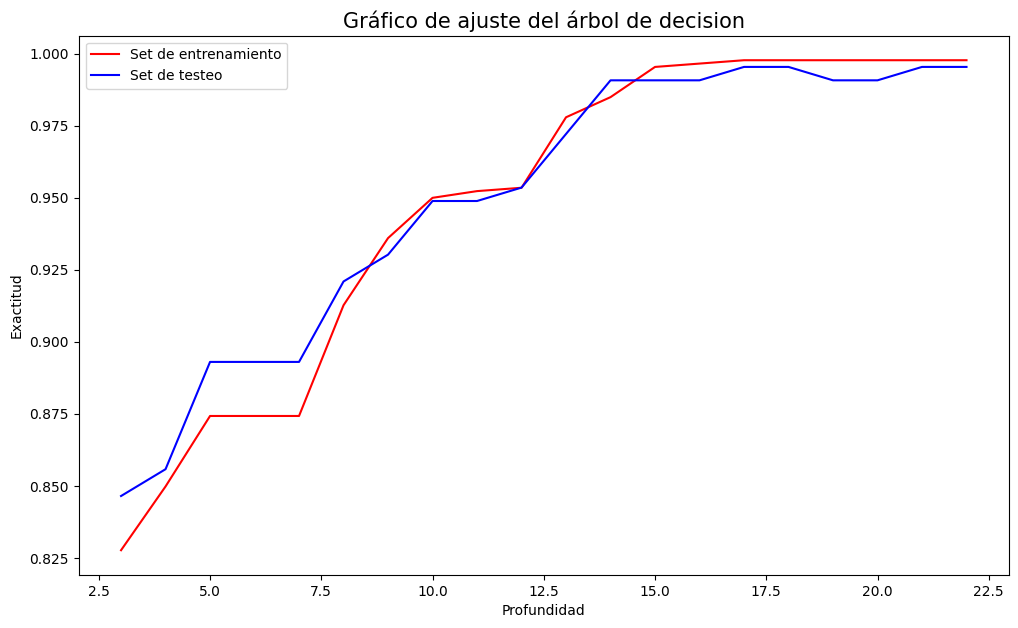

In [1125]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

### 3.8 Modelo 2:  **Árbol de decisión (max_depth = 14)** 

**3.8.1 Instanciamiento**

In [1139]:
modelo2 = DecisionTreeClassifier(max_depth=14)

**3.8.2 Entrenamiento**

In [1140]:
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14)

**3.8.2 Predicción**

In [1141]:
## Prediccion sobre set entrenamiento
y_train_pred2 = modelo2.predict(X_train)

## Prediccion sobre set testeo
y_test_pred2 = modelo2.predict(X_test)

print('Accuracy Train:', accuracy_score(y_train_pred2,y_train))
print('Accuracy Test:', accuracy_score(y_test_pred2,y_test))

Accuracy Train: 0.9627473806752037
Accuracy Test: 0.9674418604651163


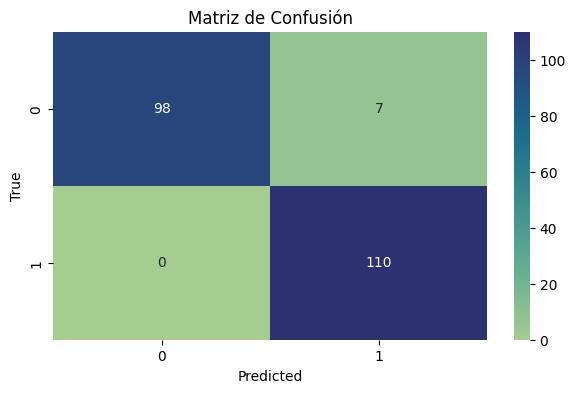

In [1142]:
matriz = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(7,4))
sns.heatmap(matriz, annot=True, fmt="d", cmap='crest')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [1143]:
metricas = classification_report(y_test, y_test_pred2)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.94      1.00      0.97       110

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



### 3.10 Modelo 3: **K-Vecinos (K = arbitrario)** 

**3.10.1 Instanciamiento**

**3.10.2 Entrenamiento**

**3.10.2 Predicción**

### 3.11 Obtenemos el valor K óptimo


### 3.12 Modelo 4: **K-Vecinos (K = 2)** 

**3.12.1 Instanciamiento**

**3.12.2 Entrenamiento**

**3.12.2 Predicción**

## 4. Conclusiones